<a href="https://colab.research.google.com/github/mrunalipawar-29/Assignment-3/blob/main/Assignment_1_LB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :- Mrunali Pawar
PRN :- 1132220838
Roll No :- 34
Machine Learning Lab - 2
Assignment - 1

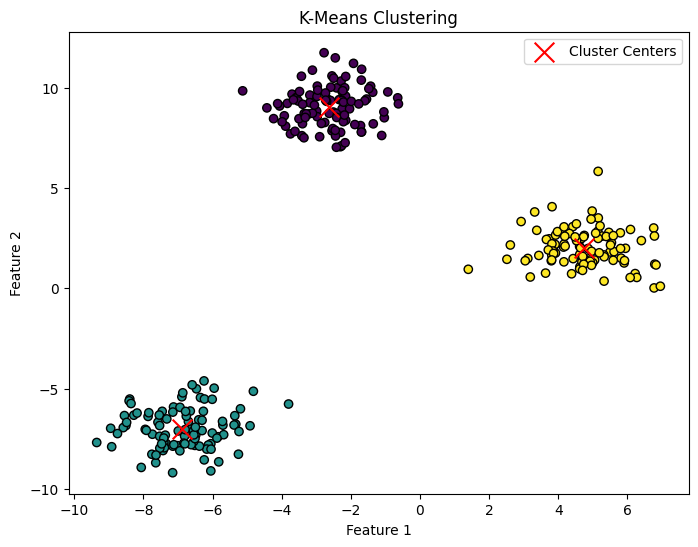

Cluster Centers:
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Cluster Labels:
[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
n_samples = 300
n_features = 2
n_clusters = 3

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Output the cluster centers and labels
print("Cluster Centers:")
print(centers)
print("Cluster Labels:")
print(labels)


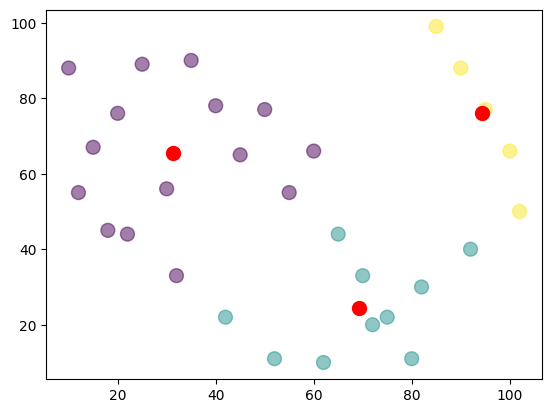

In [4]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Data = {'x':
[10, 20, 15, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102],
 'y':
[88, 76, 67, 45, 89, 56, 90, 78, 65, 77, 55, 66, 44, 33, 22, 11, 99, 88, 77, 66, 55, 44, 33, 22, 11, 10, 20, 30, 40, 50]}

df = DataFrame(Data, columns=['x', 'y'])
X = df[['x', 'y']].copy()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=30, random_state=0).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()


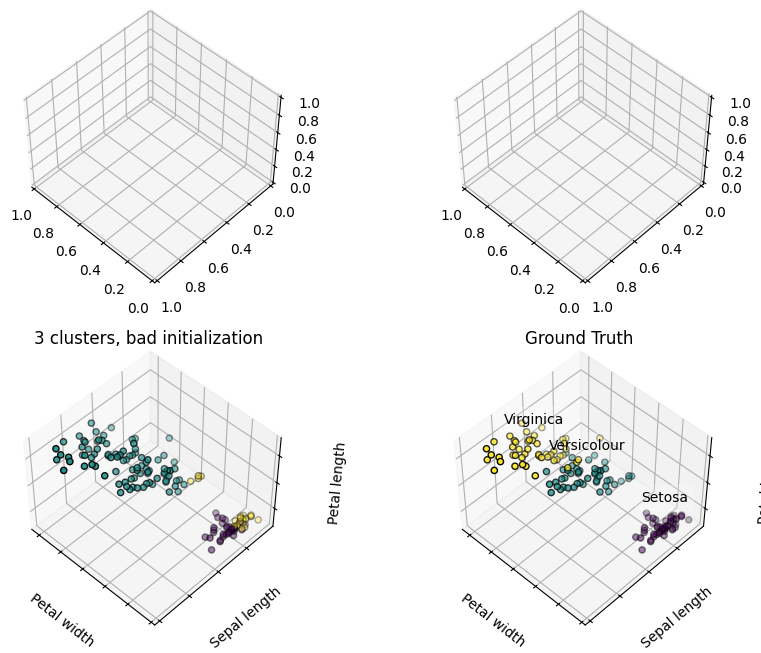

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans


np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target



estimators = [
("k_means_iris_8", KMeans(n_clusters=8)),
("k_means_iris_3", KMeans(n_clusters=3)),
("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
 ]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
 ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title(title)


ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
 ax.text3D(
X[y == label, 3].mean(),
X[y == label, 0].mean(),
X[y == label, 2].mean() + 2,
name,
horizontalalignment="center",
bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
)

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

Hieracy clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  30 non-null     int64  
 1   Feature2  30 non-null     int64  
 2   Feature3  30 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes
None
   Feature1  Feature2  Feature3
0        61       387  9.455490
1        24       470  9.053446
2        81       389  6.381100
3        70       374  9.296868
4        30       250  1.796433


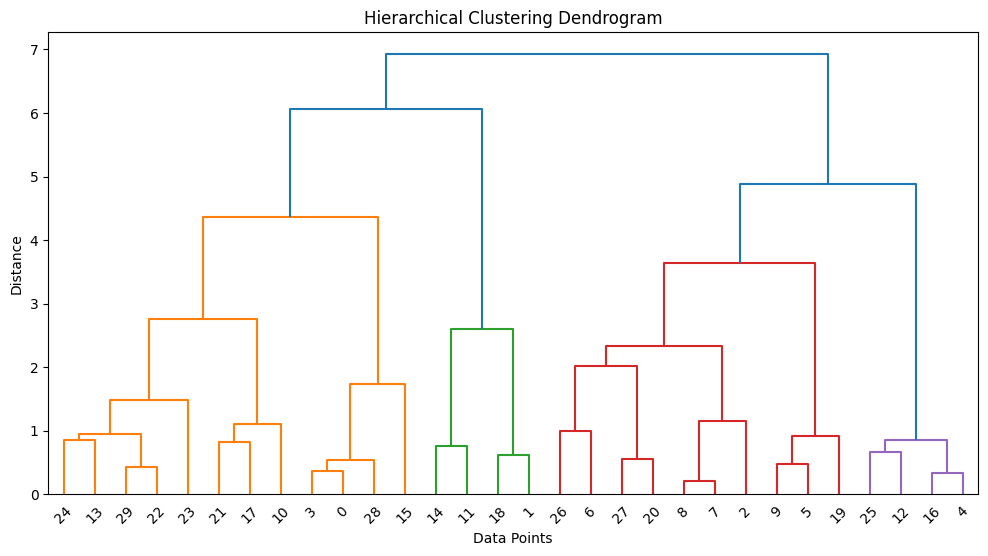

   Feature1  Feature2  Feature3  Cluster
0        61       387  9.455490        3
1        24       470  9.053446        2
2        81       389  6.381100        1
3        70       374  9.296868        3
4        30       250  1.796433        1


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
np.random.seed(42)
data = {
    'Feature1': np.random.randint(10, 100, 30),
    'Feature2': np.random.randint(200, 500, 30),
    'Feature3': np.random.uniform(1.0, 10.0, 30)
}
df = pd.DataFrame(data)

# Display basic info
print(df.info())
print(df.head())

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Performing hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Assigning cluster labels (example: choosing 3 clusters)
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')
df['Cluster'] = clusters

# Display cluster results
print(df.head())
